In [15]:
import pandas as pd
from sklearn.datasets import fetch_openml

boston = fetch_openml(name='boston', version=1, as_frame=True)
X = boston.data
y = boston.target

df = X.copy()
df['MEDV'] = y

print("Feature names:", list(X.columns))
print("Shape:", df.shape)
print("Target variable description:\n", y.describe())
print("\nFirst 5 rows:\n", df.head())


Feature names: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Shape: (506, 14)
Target variable description:
 count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

First 5 rows:
       CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


Missing values in each column:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


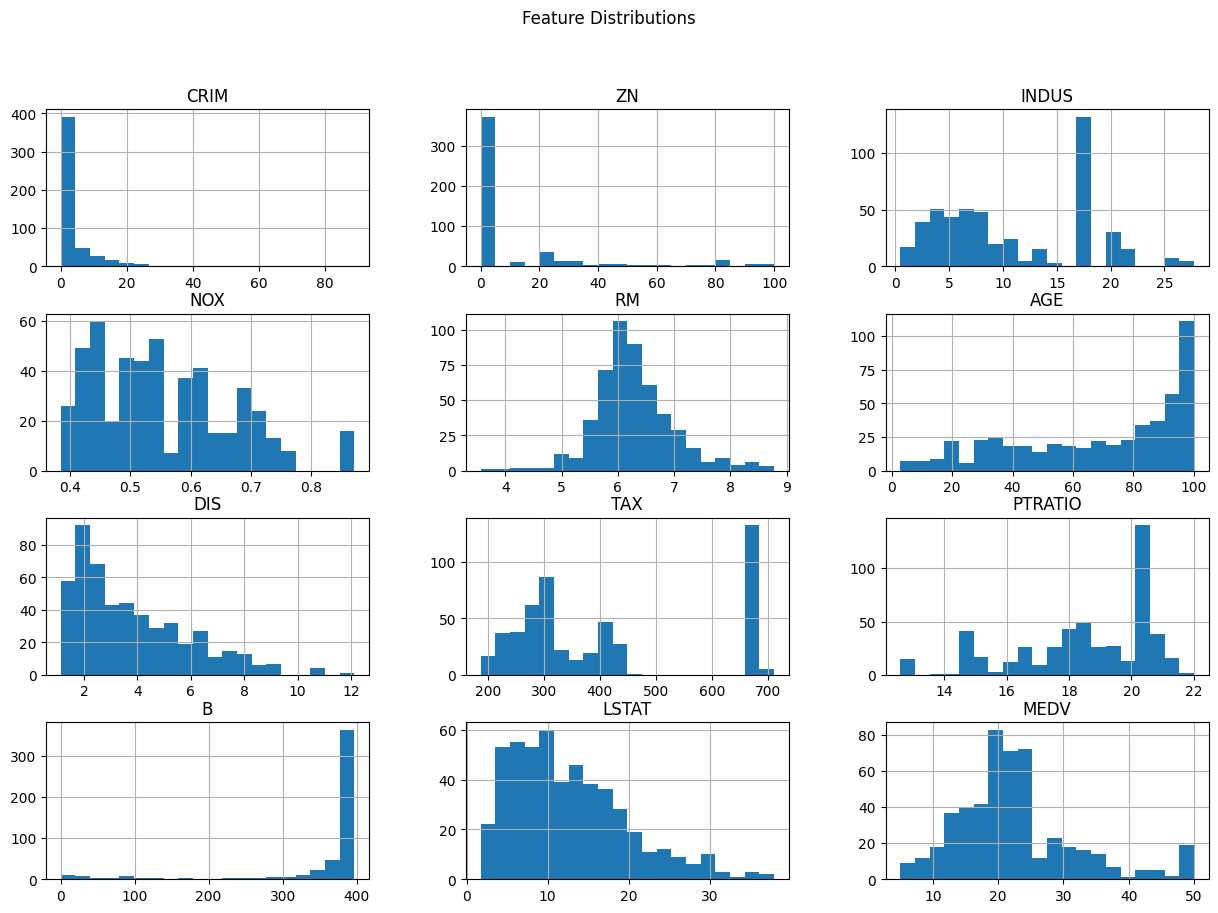

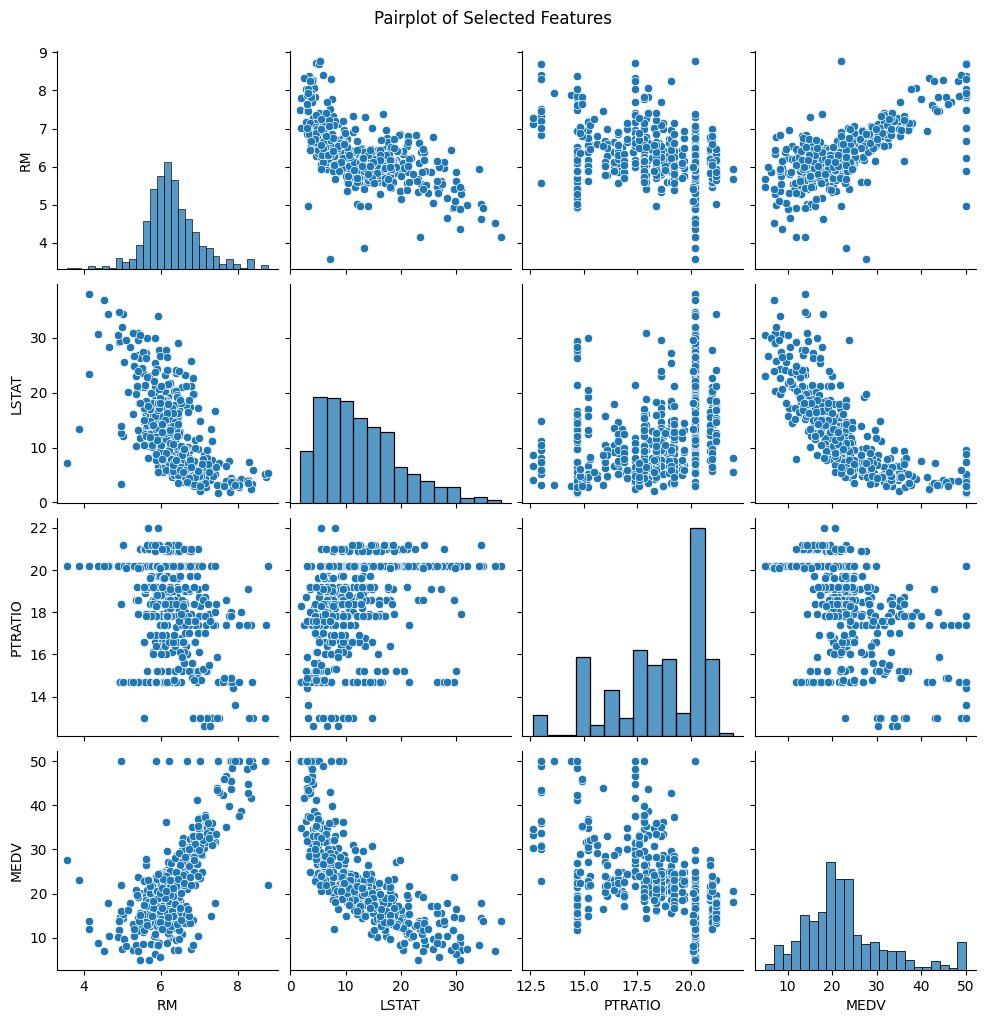

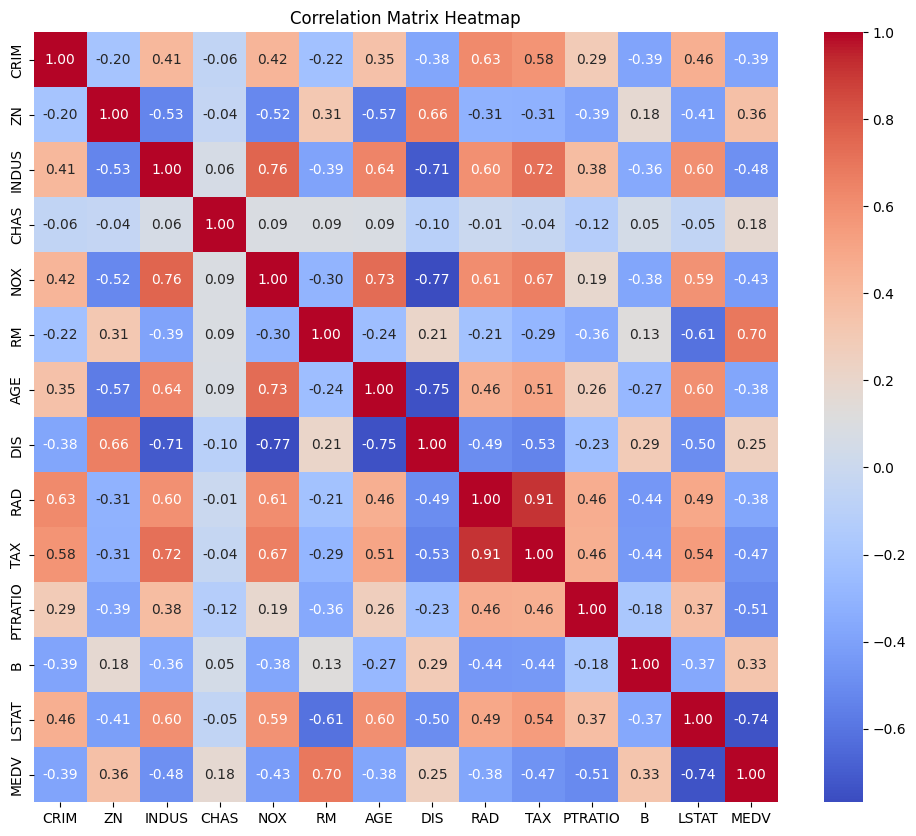

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Missing values in each column:\n", df.isnull().sum())

df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()

sns.pairplot(df[['RM', 'LSTAT', 'PTRATIO', 'MEDV']])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

Mean Squared Error: 46.14
R-squared: 0.37


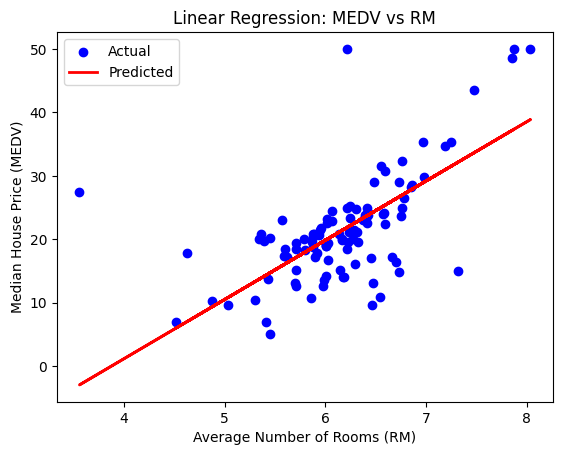

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_rm = df[['RM']]
y_medv = df['MEDV']


X_train, X_test, y_train, y_test = train_test_split(X_rm, y_medv, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median House Price (MEDV)')
plt.title('Linear Regression: MEDV vs RM')
plt.legend()
plt.show()


In [5]:
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

X_all = df.drop(columns='MEDV')
y = df['MEDV']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 3.19
MSE: 24.29
RMSE: 4.93
R² Score: 0.67



Model Coefficients:
    Feature  Coefficient
5        RM     3.115718
8       RAD     2.282785
11        B     1.126499
3      CHAS     0.706532
1        ZN     0.701556
2     INDUS     0.276752
6       AGE    -0.177060
0      CRIM    -0.971494
9       TAX    -1.792605
10  PTRATIO    -1.979954
4       NOX    -1.991430
7       DIS    -3.045771
12    LSTAT    -3.628149


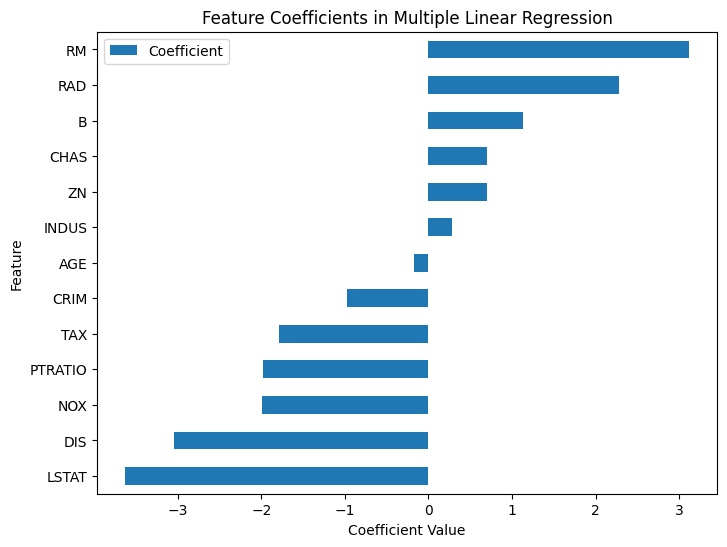

In [6]:
coefficients = pd.DataFrame({
    'Feature': X_all.columns,
    'Coefficient': model.coef_
})

print("\nModel Coefficients:")
print(coefficients.sort_values(by='Coefficient', ascending=False))

import matplotlib.pyplot as plt

coefficients.set_index('Feature').sort_values(by='Coefficient').plot(kind='barh', figsize=(8,6))
plt.title('Feature Coefficients in Multiple Linear Regression')
plt.xlabel('Coefficient Value')
plt.show()


In [7]:
import pandas as pd

data = {
    'marks': [35, 45, 60, 75, 25, 50, 65, 80, 30, 55],
    'pass': [0, 0, 1, 1, 0, 1, 1, 1, 0, 1]
}

df = pd.DataFrame(data)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df[['marks']]
y = df['pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

new_marks = [[42]]
prediction = log_model.predict(new_marks)
print("Prediction for marks=42:", "Pass" if prediction[0] == 1 else "Fail")


Accuracy: 0.6666666666666666
Prediction for marks=42: Fail


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
